# Section 2.1: Run a pre-trained ResNet

In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

In [3]:
resnet = models.resnet101(pretrained = True)

In [4]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1800x1200 at 0x129316E10>


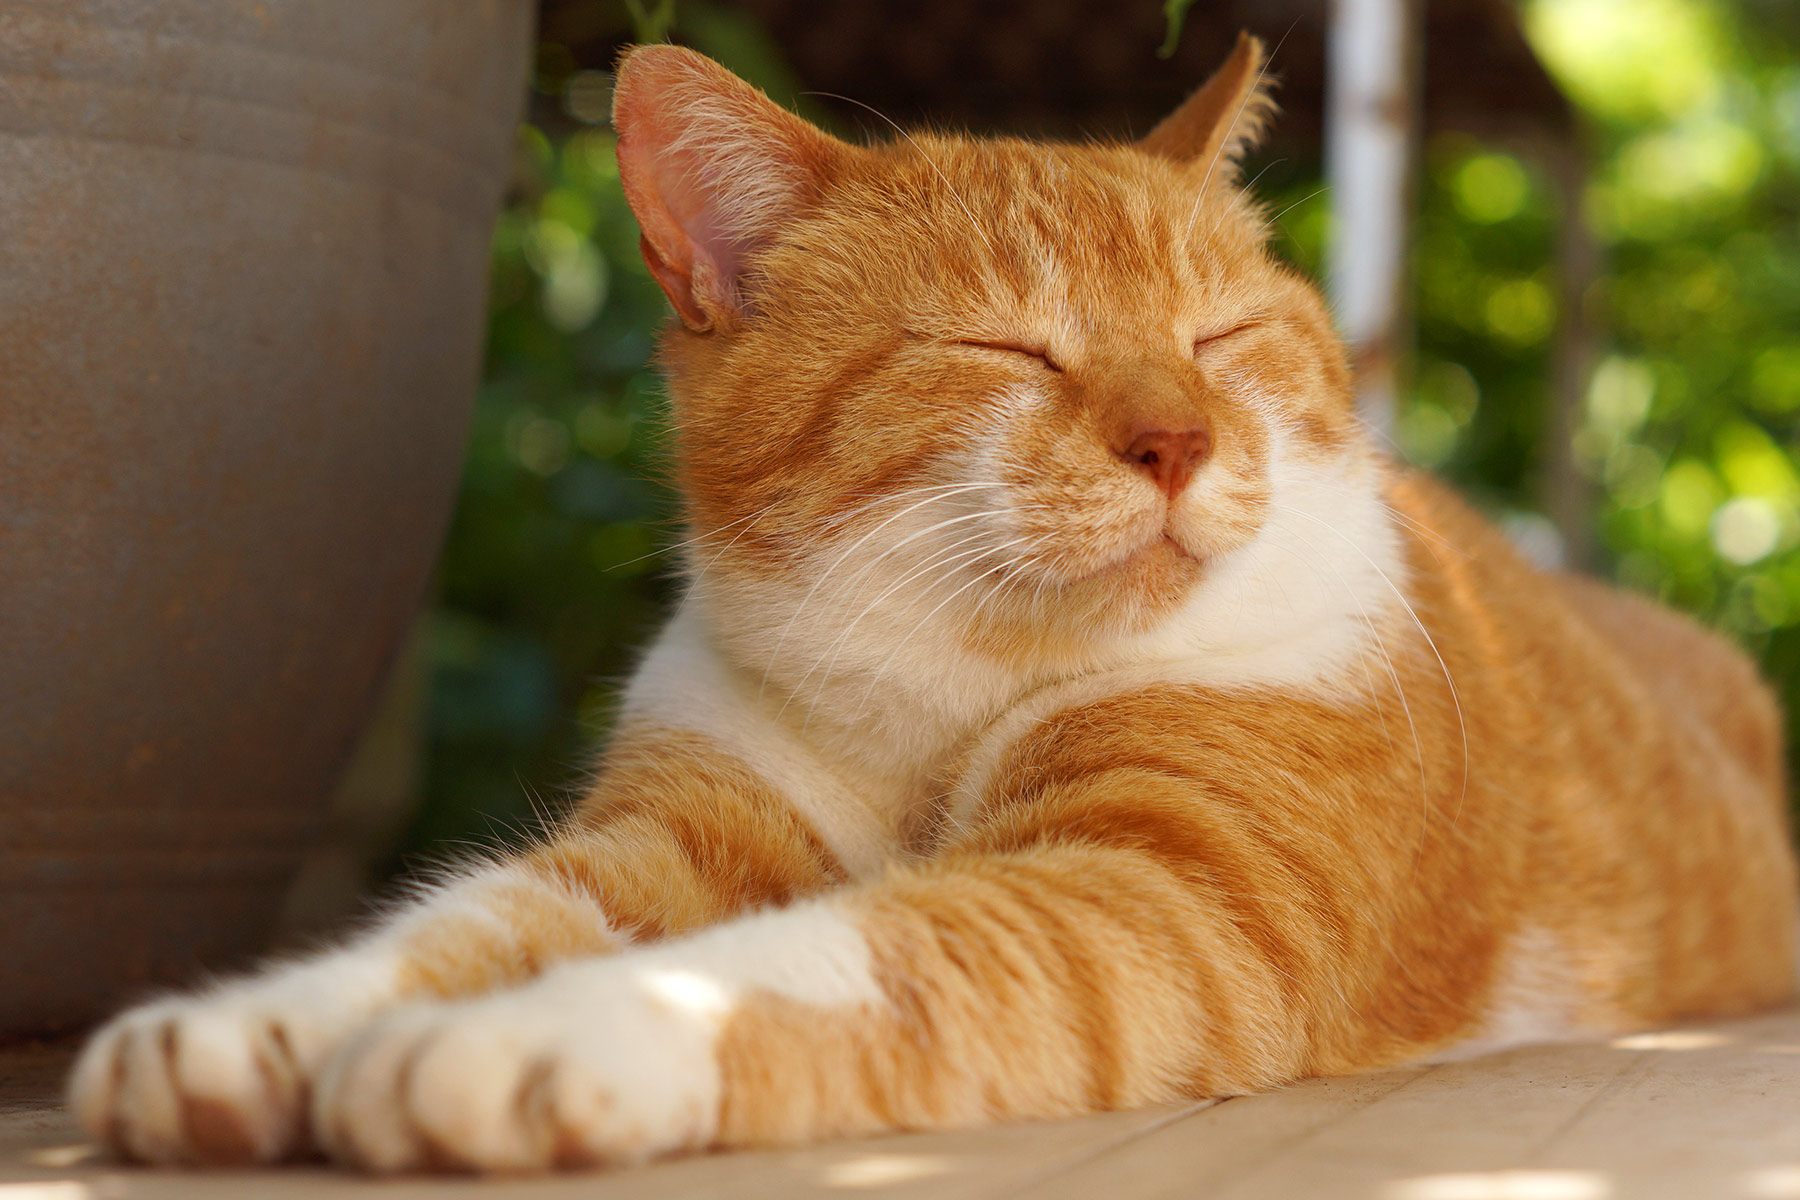

In [6]:
from PIL import Image
img = Image.open("./cat.jpeg")
print(img)
img

In [7]:
img_t = preprocess(img)
print(img_t)

tensor([[[-0.2342, -0.2856, -0.3027,  ..., -0.7137, -0.9534, -1.1932],
         [-0.2684, -0.2684, -0.2856,  ..., -0.7479, -0.9877, -1.1932],
         [-0.2856, -0.2856, -0.3198,  ..., -0.7650, -0.9877, -1.2445],
         ...,
         [ 0.7933,  0.7762,  0.7419,  ...,  0.9646,  0.9988,  1.0159],
         [ 0.7762,  0.7762,  0.7591,  ...,  0.9646,  0.9988,  1.0159],
         [ 0.7933,  0.7933,  0.7591,  ...,  0.9817,  1.0159,  1.0331]],

        [[-0.3901, -0.4251, -0.4776,  ..., -0.9503, -1.1078, -1.3004],
         [-0.3901, -0.4251, -0.4426,  ..., -0.9503, -1.1078, -1.3004],
         [-0.4251, -0.4601, -0.4776,  ..., -0.9678, -1.1429, -1.3529],
         ...,
         [ 0.3627,  0.3102,  0.2402,  ...,  0.6078,  0.6254,  0.6429],
         [ 0.3627,  0.3102,  0.2927,  ...,  0.6078,  0.6254,  0.6429],
         [ 0.3452,  0.3102,  0.2927,  ...,  0.6078,  0.6254,  0.6604]],

        [[-0.4275, -0.4798, -0.4973,  ..., -1.1421, -1.2293, -1.3339],
         [-0.4275, -0.4973, -0.5147,  ..., -1

In [8]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
out = resnet(batch_t)
print(out)

tensor([[-2.9676e+00,  3.1473e+00, -3.7565e+00, -2.6590e+00, -2.7560e+00,
         -4.2275e+00, -3.5843e+00, -2.8454e+00, -1.1660e+00, -2.0914e+00,
         -2.4000e+00, -2.4511e+00, -9.8774e-01, -2.4869e+00, -1.3543e+00,
          1.7102e-01, -2.1841e+00, -2.1454e+00, -1.2010e+00, -4.0207e+00,
         -2.3183e+00, -2.9566e+00, -1.2453e+00, -1.4909e+00, -2.3691e+00,
         -3.3081e+00, -4.0328e+00, -8.4310e-01, -2.9371e+00, -2.4879e+00,
         -3.1682e+00, -2.6241e+00, -4.2317e+00, -2.9636e+00, -2.2359e+00,
         -3.1015e+00, -1.3690e+00,  8.7082e-02, -1.9666e+00, -1.2998e+00,
         -1.4730e+00, -3.3089e-01, -1.2242e+00, -2.2750e+00, -1.2590e+00,
         -2.7966e+00,  3.5743e-01, -2.4738e+00, -2.1732e+00, -3.6956e+00,
         -2.1789e+00, -2.7933e+00, -7.7856e-01, -2.0840e+00, -7.3535e-01,
         -1.7806e+00, -8.9805e-01, -1.9178e+00, -2.0929e+00, -1.1060e+00,
          1.5553e-01, -1.2903e+00, -1.6115e+00, -3.3497e+00, -2.6345e+00,
         -3.7843e+00, -7.2912e-02,  7.

In [10]:
with open("./imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [11]:
_, index = torch.max(out, 1)
print(index)

tensor([282])


In [12]:
percentage = torch.nn.functional.softmax(out, dim = 1)[0] * 100
print("predicted label: {}, confident: {}".format(labels[index[0]], percentage[index[0]]))

predicted label: tiger cat, confident: 91.57417297363281


In [13]:
_, indices = torch.sort(out, descending = True)
print([(labels[idx], percentage[idx].item()) for idx in indices[0][0:5]])

[('tiger cat', 91.57417297363281), ('tabby, tabby cat', 5.845616340637207), ('Egyptian cat', 0.7996081113815308), ('computer keyboard, keypad', 0.3667326867580414), ('carton', 0.23582515120506287)]
